<img src="../images/pyladiesmadrid_alargado.png" style="width: 500px;"/>

Notebook basado en: https://github.com/CAChemE/python-analisis-modelado-datos/blob/master/notebooks/0101_Pandas-Carga-datos-y-manipulacion.ipynb realizado por Juan Luis Cano, Álex Sáez y Mabel Delgado, con MIT License

---

# Pandas: Carga y manipulación básica de datos

_Hasta ahora hemos visto las diferentes estructuras para almacenamiento de datos que nos ofrece Python, como; integer, real, complex, boolen, list, tuple, dictionary... Sin embargo, también se pueden utilizar arrays a través del paquete `NumPy`, , y otros tipos de estructuras._

_En este notebook, vamos a presentar y empezar a trabajar con el paquete `pandas`. En concreto, nos basaremos en algunos problemas para ver las características de sus estructuras de datos, y para aprender a cargar datos y empezar a manipularnos._

---

## ¿Qué es pandas?

`pandas` es una libreria que nos proporciona estructuras de datos y herramientas para realizar análisis de grandes volúmenes de datos de manera rápida.

Es de gran utilidad en la industria del Big Data, pues un grandísmo porcentaje del tiempo de trabajo de un Data Scientist, está asociado a la limpieza y preparación de los datos (ver [artículo](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#a5231076f637)), y pandas nos ayuda mucho en esta tarea.  

De manera estándar y por convenio, pandas se importa de la siguiente forma:

In [1]:
import pandas as pd

## Cargando los datos

Trabajaremos sobre un fichero de datos metereológicos de AEMET obtenido de su portal de datos abiertos (Trabajaremos sobre un fichero de datos metereológicos de [AEMET obtenido de su portal de datos abiertos](https://opendata.aemet.es/centrodedescargas/inicio)

Vemos que pinta tiene el fichero:

In [2]:
# en Linux
!head ../data/alicante_city_climate_AEMET.csv

created on: Tue Feb 20 01:16:55 2018

dir	fecha	indicativo	nombre	prec	presMax	presMin	provincia	racha	sol	tmax	tmed	tmin	velmedia
14.0	2015-01-01	8025	ALICANTE/ALACANT	0.0	1027.2	1019.8	ALICANTE	4.7	8.6	16.0	9.6	3.2	1.4
19.0	2015-01-02	8025	ALICANTE/ALACANT	0.0	1028.8	1025.3	ALICANTE	4.2	8.8	18.1	10.0	2.0	1.1
99.0	2015-01-03	8025	ALICANTE/ALACANT	0.0	1027.8	1022.5	ALICANTE	7.2	8.6	19.5	11.3	3.1	2.2
6.0	2015-01-04	8025	ALICANTE/ALACANT	0.0	1022.5	1020.4	ALICANTE	6.1	8.8	20.3	13.4	6.5	1.7
99.0	2015-01-05	8025	ALICANTE/ALACANT	0.0	1021.5	1017.0	ALICANTE	4.2	8.9	16.9	10.8	4.8	1.1
7.0	2015-01-06	8025	ALICANTE/ALACANT	0.0	1018.1	1014.5	ALICANTE	5.0	8.9	15.6	9.6	3.5	1.1
12.0	2015-01-07	8025	ALICANTE/ALACANT	0.0	1023.8	1018.1	ALICANTE	4.7	4.6	17.2	11.1	5.0	0.8


In [3]:
# en Windows
# !more ..\data\alicante_city_climate_AEMET.csv

Vemos que los datos no están en formato CSV, aunque sí que tienen algo de estructura.

¿Qué sucede si intentamos cargarlos con pandas?

In [4]:
pd.read_csv("../data/alicante_city_climate_AEMET.csv").head(5)

,created on: Tue Feb 20 01:16:55 2018
0,dir\tfecha\tindicativo\tnombre\tprec\tpresMax\...
1,14.0\t2015-01-01\t8025\tALICANTE/ALACANT\t0.0\...
2,19.0\t2015-01-02\t8025\tALICANTE/ALACANT\t0.0\...
3,99.0\t2015-01-03\t8025\tALICANTE/ALACANT\t0.0\...
4,6.0\t2015-01-04\t8025\tALICANTE/ALACANT\t0.0\t...


Tenemos que hacer los siguientes cambios:
* Separar los campos por tabuladores.
* Saltar las primeras lineas.
* Descartar columnas que no nos interesan.
* Dar nombre a las nuevas columnas.
* Convertir las fechas al formato correcto.
* Definir la fecha como índice.

In [5]:
data = pd.read_csv(
    "../data/alicante_city_climate_AEMET.csv",
    skiprows=3,
    delimiter='\t',
    usecols=[0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13],
    names=['DIR', 'DATE', 'NAME', 'PRECIP', 'PMAX', 'PMIN', 'MAG_MAX', 'TMAX', 'TMED', 'TMIN', 'MAG_MED'],
    parse_dates=['DATE'],
    index_col=['DATE']
    )

data.head()

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-01,14.0,ALICANTE/ALACANT,0.0,1027.2,1019.8,4.7,16.0,9.6,3.2,1.4
2015-01-02,19.0,ALICANTE/ALACANT,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-03,99.0,ALICANTE/ALACANT,0.0,1027.8,1022.5,7.2,19.5,11.3,3.1,2.2
2015-01-04,6.0,ALICANTE/ALACANT,0.0,1022.5,1020.4,6.1,20.3,13.4,6.5,1.7
2015-01-05,99.0,ALICANTE/ALACANT,0.0,1021.5,1017.0,4.2,16.9,10.8,4.8,1.1


<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

## Explorando los datos

In [6]:
# recuperar los tipos de datos de cada columna
data.dtypes

DIR        float64
NAME        object
PRECIP     float64
PMAX       float64
PMIN       float64
MAG_MAX    float64
TMAX       float64
TMED       float64
TMIN       float64
MAG_MED    float64
dtype: object

In [7]:
# recuperar los índices
data.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1096, freq=None)

In [8]:
# Muestro solo las primers 4 líneas
data.head(4)

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-01,14.0,ALICANTE/ALACANT,0.0,1027.2,1019.8,4.7,16.0,9.6,3.2,1.4
2015-01-02,19.0,ALICANTE/ALACANT,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-03,99.0,ALICANTE/ALACANT,0.0,1027.8,1022.5,7.2,19.5,11.3,3.1,2.2
2015-01-04,6.0,ALICANTE/ALACANT,0.0,1022.5,1020.4,6.1,20.3,13.4,6.5,1.7


In [9]:
# Muestro sólo las últimas 6 líneas
data.tail(6)

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2017-12-26,31.0,ALICANTE/ALACANT,0.0,1012.7,1003.2,9.7,19.4,13.3,7.2,2.8
2017-12-27,30.0,ALICANTE/ALACANT,0.0,1004.0,994.6,18.6,17.5,14.0,10.5,4.7
2017-12-28,31.0,ALICANTE/ALACANT,0.0,1005.9,999.6,12.5,22.6,16.6,10.7,2.5
2017-12-29,27.0,ALICANTE/ALACANT,0.0,1016.3,1005.8,14.2,21.5,18.0,14.4,2.8
2017-12-30,28.0,ALICANTE/ALACANT,0.0,1016.9,1013.5,9.2,24.0,17.0,10.1,2.8
2017-12-31,28.0,ALICANTE/ALACANT,0.0,1018.1,1010.1,16.4,18.7,13.3,7.9,2.5


In [12]:
# Numero de filas y columnas en el dataset
data.shape

(1096, 10)

In [13]:
# contamos cuantos elementos tenemos sin valor
data.isnull().sum()

DIR        23
NAME        0
PRECIP     35
PMAX        2
PMIN        2
MAG_MAX    23
TMAX        2
TMED        2
TMIN        2
MAG_MED    21
dtype: int64

In [14]:
# contamos cuantos elementos tenemos con valor
data.count(axis=0)

DIR        1073
NAME       1096
PRECIP     1061
PMAX       1094
PMIN       1094
MAG_MAX    1073
TMAX       1094
TMED       1094
TMIN       1094
MAG_MED    1075
dtype: int64

### Descripción estadística

Se pueden pedir los datos estadísticos asociados al dataframe.

In [15]:
# Descripción estadística
data.describe()

,DIR,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
count,1073.000000,1061.000000,1094.000000,1094.000000,1073.000000,1094.000000,1094.000000,1094.000000,1075.000000
mean,20.983225,0.801885,1011.154479,1006.691865,8.047064,24.039488,19.031718,14.022212,2.220279
std,21.613931,5.249819,6.074767,6.570117,2.833214,5.670956,5.660407,5.952143,0.811738
min,1.000000,0.000000,988.200000,980.100000,2.800000,8.500000,4.600000,0.300000,0.600000
25%,8.000000,0.000000,1007.300000,1002.900000,6.100000,19.400000,14.025000,9.100000,1.700000
50%,14.000000,0.000000,1010.600000,1006.500000,7.200000,23.700000,18.900000,13.800000,2.200000
75%,24.000000,0.000000,1014.300000,1010.300000,9.700000,28.800000,23.800000,18.775000,2.500000
max,99.000000,112.200000,1034.000000,1030.000000,19.700000,38.800000,31.400000,27.200000,6.100000


Por defecto, los elementos con NA no se tienen en cuenta a la hora de calcular los valores.

In [16]:
# media
data.mean()

DIR          20.983225
PRECIP        0.801885
PMAX       1011.154479
PMIN       1006.691865
MAG_MAX       8.047064
TMAX         24.039488
TMED         19.031718
TMIN         14.022212
MAG_MED       2.220279
dtype: float64

## Accediendo a los datos.

Tenemos dos funciones principales para acceder a los datos, que son `.loc` que permite acceder por etiquetas, y `.iloc`que permite acceder por índices. 

In [17]:
# accediendo a una columna por el nombre (label) y obteniendo un dataframe.
data[['TMAX']].head()

,TMAX
DATE,
2015-01-01,16.0
2015-01-02,18.1
2015-01-03,19.5
2015-01-04,20.3
2015-01-05,16.9


In [18]:
# accediendo a varias columnas por el nombre (label)
data[['TMAX', 'TMED']].head()

,TMAX,TMED
DATE,,
2015-01-01,16.0,9.6
2015-01-02,18.1,10.0
2015-01-03,19.5,11.3
2015-01-04,20.3,13.4
2015-01-05,16.9,10.8


In [23]:
# accediendo a files y columnas por etiquetas
data.loc[[pd.to_datetime("2016-12-01"), pd.to_datetime("2016-12-03")], ["TMAX", "TMIN"]]

,TMAX,TMIN
DATE,,
2016-12-01,16.5,11.3
2016-12-03,18.5,7.5


In [24]:
# accediendo a filas y columnas por posiciones enteras
data.iloc[[1,10,3], [2, 3]]

,PRECIP,PMAX
DATE,,
2015-01-02,0.0,1028.8
2015-01-11,0.0,1024.0
2015-01-04,0.0,1022.5


## Filtrado de datos

In [25]:
# busco duplicados en las fechas
data[data.index.duplicated()]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,


In [27]:
# 0<TMin< 2
data[(0<data['TMIN']) & (data['TMIN']< 2)]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-18,19.0,ALICANTE/ALACANT,7.0,1012.5,998.5,5.3,14.6,7.4,0.3,1.4
2015-02-07,16.0,ALICANTE/ALACANT,0.0,1012.7,1004.8,5.6,11.6,6.5,1.4,1.1
2015-02-08,18.0,ALICANTE/ALACANT,0.0,1013.3,1009.1,7.8,14.4,8.0,1.6,1.9
2015-02-09,7.0,ALICANTE/ALACANT,0.4,1016.3,1009.9,11.4,13.2,7.4,1.7,3.3
2016-01-17,19.0,ALICANTE/ALACANT,0.0,1019.7,1011.1,5.0,15.0,8.0,1.0,1.4
2017-01-18,7.0,ALICANTE/ALACANT,16.4,1010.1,1007.9,8.9,8.5,4.6,0.6,1.9
2017-12-04,11.0,ALICANTE/ALACANT,0.0,1026.3,1020.1,4.7,15.1,8.1,1.1,1.4
2017-12-05,22.0,ALICANTE/ALACANT,0.0,1027.2,1024.8,4.7,16.7,8.8,0.9,1.1
2017-12-18,30.0,ALICANTE/ALACANT,0.4,1021.8,1011.5,10.8,16.0,8.8,1.5,1.7


## Representaciones de datos

In [29]:
# Importamos  matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#### Líneas

Text(0.5, 1.0, 'Temperaturas')

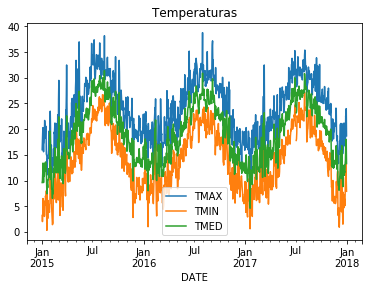

In [30]:
# Pintar la temperatura máx, min, med
ax = data[["TMAX", "TMIN", "TMED"]].plot()
ax.set_xlabel('DATE')
ax.set_title('Temperaturas')

Pintar datos para una fecha.

#### barras

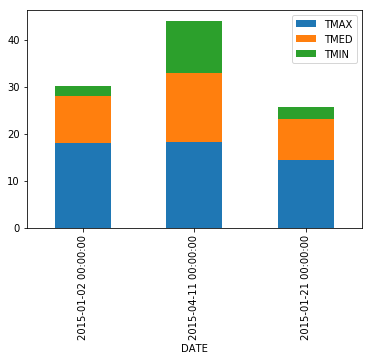

In [36]:
data.iloc[[1,100,20], [6,7,8]].plot(kind='bar', stacked=True)

In [31]:
# crear widget
from ipywidgets import interact

In [32]:
minval = data[["TMIN"]].min().values[0]
maxval = data[["TMAX"]].max().values[0]
minval, maxval

(0.3, 38.8)

In [33]:
def plot_data(date):
    
    plt.figure()
    plt.plot(data.loc[pd.to_datetime(date), ["TMAX", "TMIN", "TMED"]], marker='o')
    plt.ylim([0, 40])
    plt.show()

In [34]:
data.sort_index(inplace=True)

In [35]:
interact(plot_data, date=data.index)

interactive(children=(Dropdown(description='date', options=(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-…

<function __main__.plot_data(date)>

---

Hemos aprendido:
* Como leer un CSV con distintos formatos utilizando la librería pandas.
* Como extraer información de la librería los datos cargados.
* Como acceder a los datos cargados.
* Como representar datos con pandas.

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

In [39]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/pyladiesmadrid_notebook.css'
HTML(open(css_file, "r").read())